In [20]:
from scipy.optimize import curve_fit
from scipy.stats import chisquare, chi2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
#importing data from excel file
path_link = r"C:\Users\GAdmin\Desktop\srp\beam.xlsx"
Data_x = pd.read_excel(path_link)
Data_x = Data_x[['Distance from lens mm', 'beam radius mm', 'stddev mm']]
Data_x

,Distance from lens mm,beam radius mm,stddev mm
0,39.92,971.0,0.707107
1,94.85,827.2,1.435270
2,172.92,680.1,0.860233
3,250.99,541.3,0.509902
4,329.06,400.7,0.678233
5,407.13,268.5,0.707107
6,485.20,132.0,0.316228
7,563.27,62.5,0.316228
8,641.34,121.2,0.244949
9,719.41,243.5,0.316228


In [22]:
x_values = Data_x['Distance from lens mm'] * 10**-3 #m
y_values = Data_x['beam radius mm'] * 10**-6        #m
stddev = Data_x['stddev mm'] * 10**-6               #m

In [23]:
#curve fitting
wavelength = 532 * 10**-9 #m

def waist_func(z, w0, z0, Zrm):
    return w0 * np.sqrt(1 + (((z - z0) ** 2) / (Zrm**2)))

popt, pcov = curve_fit(waist_func, x_values, y_values, p0 = [0.0002, 0.6, 0.02])

print("Optimal parameters", popt)

w0, z0, Zrm = popt

unc_w0 = pcov[0,0]**0.5
unc_z0 = pcov[1,1]**0.5
unc_Zrm = pcov[2,2]**0.5

Optimal parameters [4.12957244e-05 5.70721953e-01 2.37402841e-02]


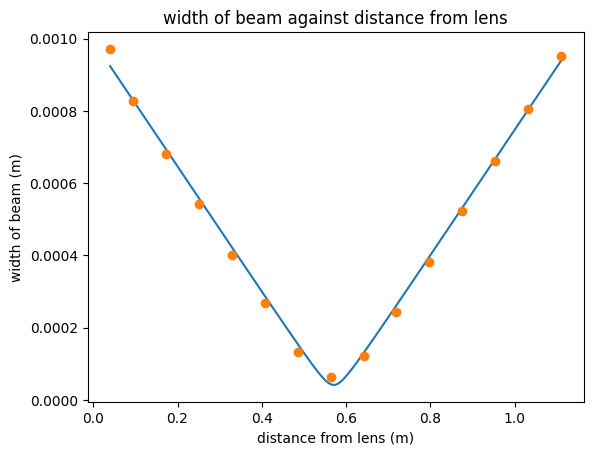

In [24]:
dx = np.linspace(0.03992, 1.10976, 10000)
y_fit = waist_func(dx, w0, z0, Zrm)

#plotting equation with fitted variables (X axis) 
plt.xlabel("distance from lens (m)")
plt.ylabel("width of beam (m)")
plt.title("width of beam against distance from lens")
plt.plot(dx, y_fit)
plt.errorbar(x_values, y_values, fmt = 'o',  yerr=stddev, capsize=3, ecolor = "black")
plt.show()

In [25]:
#Calculating parameters
def parameters(w0, Zrm):
    beam_divergence_angle = w0/Zrm
    unc_bda = (unc_w0 + unc_Zrm) * beam_divergence_angle
    m_squared_value = (np.pi*w0**2)/(wavelength*Zrm)
    unc_m2 = (2 * unc_w0 + unc_Zrm) * m_squared_value

    return beam_divergence_angle, m_squared_value, unc_bda, unc_m2

beam_divergence_angle, m_squared_value, unc_bda, unc_m2 = parameters(w0, Zrm)

print("waist: ", w0, "m +-", unc_w0)
print("rayleigh range: ", Zrm, "m +-", unc_Zrm / Zrm * 100)
print("beam divergence angle: ", beam_divergence_angle, "m +-", unc_bda)
print("M^2 value: ", m_squared_value, "m +-", unc_m2)

waist:  4.1295724436883e-05 m +- 1.9893413495473966e-05
rayleigh range:  0.023740284069200892 m +- 48.40544040644888
beam divergence angle:  0.0017394789513263409 m +- 2.0023981456752157e-05
M^2 value:  0.4241920329867886 m +- 0.004891517779551046


In [26]:
y_pred = waist_func(x_values, w0, z0, Zrm)
y_meas = y_values
errors = y_meas - y_pred
chi_sq = np.sum(((y_meas - y_pred) ** 2) / y_pred)
reduced_chisq = chi_sq / (len(y_meas)-1)
reduced_chisq

1.432318073618317e-06